In [1]:
!pip install tsp

In [2]:
import tsp
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
#DANE
#https://dateandtime.info/pl/citycoordinates.php?id=3094802
#https://www.wspolrzedne-gps.pl

In [4]:

all_cit=np.array([
             [20.6275200,50.8703300],#Kielce
             [21.7489800,50.6826500],#Sandomierz
    [19.9667772,50.8520727],#Włoszczowa
    [20.3046116,50.6394435],#Jędrzejów
    [20.5256241,50.5201929],#Pinczów
    [20.71919,50.46759],#Busko-Zdrój
    [20.4853308,50.267489],#Kazimierza Wileka
    [21.1677849,50.5612276],#Staszów
    [21.4238281,50.8017661],#Opatów
    [21.38743,50.9398768],#Ostrowiec Świętokrzyski
    [21.0761377,51.0518865],#Starachowice
    [20.857883,51.1138821],#Skarżysko Kamienna
    [20.4071836,51.1910223],#Końskie
    [19.9365800,50.0614300],#Kraków
    [20.0276912,50.3566016],#Miechów
    [19.5596307,50.2788158],#Olkusz
    [19.4028502,50.1411926],#Chrzanów
    [19.2214053,50.0382443],#Oświęcim
    [19.4925345,49.8834484],#Wadowica
    [19.9384283,49.834608],#Myślenice
    [19.5905975,49.74079],#Sucha Beskidzka
    [20.030541,49.4818229],#Nowy targ
    [19.950659,49.2969446],#Zakopane
    [20.4217266,49.7061713],#Limanowa
    [20.691346,49.6249173],#Nowy Sacz
    [21.1593832,49.65829],#Gorlice
    [20.9880739,50.0123784],#Tarnow
    [20.6068496,49.9678396],#Brzesko
    [20.430541,49.9693563],#Bochnia
    [20.9850707,50.1743495],#Dąbrowa tarnowska
    [20.0602114,49.9823773],#Wieliczka
    [22.0644075,50.5653105],#Stalowa Wola
    [21.6704871,50.5715277],#Tarnobrzeg
    [22.139886,50.5198985],#Nisko
    [21.4243685,50.2892506],#Mielec
    [21.7754563,50.2433277],#Kolbuszowa
    [22.418892,50.2621687],#Leżajsk
    [23.1225859,50.1574473],#Lubaczów
    [22.678605,50.0104958],#Jarosław
    [22.4923769,50.0601735],#Przeworsk
    [22.2320924,50.0690725],#Łańcut
    [21.6116324,50.0528608],#Ropczyce
    [21.4104804,50.0514601],#Dębica
    [21.4743139,49.7470465],#Jasło
    [21.7856291,49.8702087],#Strzyżów
    [21.7651458,49.6938045],#Krosno
    [22.0196537,49.6950395],#Brzozów
    [22.207028,49.5609053],#Sanok
    [22.7692634,49.7821562],#Przemyśl
    [22.3303816,49.4689014],#Lesko
    [22.5877003,49.4301874],#Ustrzyki Dolne
    [21.9990100,50.0413200]#Rzeszów
            
])

n=len(all_cit)
#          x             y

In [5]:
n

52

(19, 23.3)

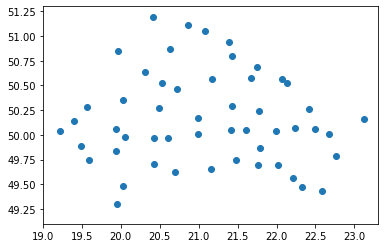

In [6]:
plt.scatter(all_cit[:,0],all_cit[:,1])
plt.ylim(49.1,51.3)
plt.xlim(19,23.3)


In [7]:
def all_dist(i,j): # funkcja odległości między wszystkimi miastami
    return np.sqrt((all_cit[i,0]-all_cit[j,0])**2 + (all_cit[i,1]-all_cit[j,1])**2)

In [8]:
# tablica odległości wszystkich miast
dt=[[all_dist(i,j) for i in range(n)] for j in range(n)]
np.round(np.array(dt),2)

array([[0.  , 1.14, 0.66, ..., 2.21, 2.43, 1.6 ],
       [1.14, 0.  , 1.79, ..., 1.35, 1.51, 0.69],
       [0.66, 1.79, 0.  , ..., 2.74, 2.98, 2.19],
       ...,
       [2.21, 1.35, 2.74, ..., 0.  , 0.26, 0.66],
       [2.43, 1.51, 2.98, ..., 0.26, 0.  , 0.85],
       [1.6 , 0.69, 2.19, ..., 0.66, 0.85, 0.  ]])

In [9]:
# konwersja tablicy odległości do słownika (potrzebne dalej dla wołania f. bibliotecznej)
dis = {(i, j): dt[i][j] for i in range(n) for j in range(n)}

In [10]:
time0 = time.time()    # czas start
t_tsp = tsp.tsp(range(n),dis) # znajdź DOKŁADNE rozwiązanie
time1 = time.time()    # czas stop

print(t_tsp)
print("czas wykonania:",round(time1 - time0,1),"s")

(15.488079049191967, [0, 12, 2, 3, 14, 15, 16, 17, 18, 20, 22, 21, 19, 13, 30, 23, 24, 27, 28, 6, 4, 5, 29, 26, 25, 43, 45, 44, 46, 47, 49, 50, 48, 37, 38, 39, 36, 40, 51, 33, 31, 1, 32, 35, 41, 42, 34, 7, 8, 9, 10, 11])
czas wykonania: 240.9 s


In [11]:
p_tsp=np.array(t_tsp[1]) # najkrótsza trasa
t_tsp[0] # długość najkrótszej trasy

15.488079049191967

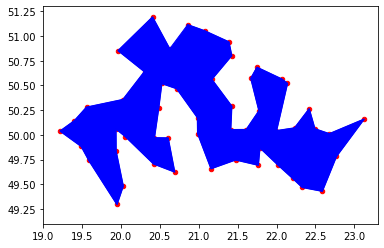

In [12]:
tour=np.array([all_cit[i] for i in t_tsp[1]]) # tablica współrzędnych
lenpa=np.round(t_tsp[0],3) # długość najkrótszej trasy

plt.ylim(49.1,51.3)
plt.xlim(19,23.3)

plt.scatter(all_cit[:,0],all_cit[:,1],c='red', s=20)

plt.fill(tour[:,0],tour[:,1],c='blue')
plt.plot(tour[:,0],tour[:,1],c='blue')



In [13]:
import math as m

In [30]:

def dist(i,j):
    R=6400
    return R*np.arccos((m.sin(all_cit[i,1]/180)*m.sin(all_cit[j,1]/180) +
               m.cos(all_cit[i,1]/180)*m.cos(all_cit[j,1]/180)*m.cos((all_cit[i,0]/180)-(all_cit[j,0]/180))))

In [33]:
dist(1,2)

61.1608933751949

In [34]:
all_cit[0]


array([20.62752, 50.87033])

In [35]:
#def all_dist(i,j): # funkcja odległości między wszystkimi miastami
    #return np.sqrt((all_cit[i,0]-all_cit[j,0])**2 + (all_cit[i,1]-all_cit[j,1])**2)

In [36]:
dt=[[dist(i,j) for i in range(n)] for j in range(n)]
np.round(np.array(dt),2)

C:\Users\minik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


array([[  0.  ,  38.88,  22.57, ...,  76.62,  84.33,  55.36],
       [ 38.88,   0.  ,  61.16, ...,  47.51,  52.97,  24.35],
       [ 22.57,  61.16,   0.  , ...,  94.59, 102.88,  75.18],
       ...,
       [ 76.62,  47.51,  94.59, ...,   0.  ,   8.91,  23.3 ],
       [ 84.33,  52.97, 102.88, ...,   8.91,   0.  ,  29.63],
       [ 55.36,  24.35,  75.18, ...,  23.3 ,  29.63,   0.  ]])

In [37]:
# konwersja tablicy odległości do słownika (potrzebne dalej dla wołania f. bibliotecznej)
dis = {(i, j): dt[i][j] for i in range(n) for j in range(n)}

In [38]:
dis

{(0, 0): 0.0,
 (0, 1): 38.87512466882579,
 (0, 2): 22.570776379405444,
 (0, 3): 13.747890478665331,
 (0, 4): 12.926619709864012,
 (0, 5): 14.657965659939109,
 (0, 6): 21.97784476674009,
 (0, 7): 21.47701351877809,
 (0, 8): 27.3005579228632,
 (0, 9): 26.06328976554441,
 (0, 10): 16.620657909304732,
 (0, 11): 11.697650842057596,
 (0, 12): 13.659677527628421,
 (0, 13): 37.20890842399574,
 (0, 14): 27.44938816315357,
 (0, 15): 42.108836330259834,
 (0, 16): 49.22154660246317,
 (0, 17): 56.422567212353236,
 (0, 18): 52.30207497976721,
 (0, 19): 43.71117348299161,
 (0, 20): 53.56096877724339,
 (0, 21): 53.42038474362166,
 (0, 22): 60.53970240938777,
 (0, 23): 41.98561244741473,
 (0, 24): 44.33504386997461,
 (0, 25): 46.77180547753018,
 (0, 26): 32.89869989645789,
 (0, 27): 32.096319851294695,
 (0, 28): 32.73407236744813,
 (0, 29): 27.596730777777807,
 (0, 30): 37.047687821356234,
 (0, 31): 50.258721867596435,
 (0, 32): 37.17134126066794,
 (0, 33): 53.13588651284091,
 (0, 34): 34.1738396514108

In [39]:
time0 = time.time()    # czas start
t_tsp = tsp.tsp(range(n),dis) # znajdź DOKŁADNE rozwiązanie
time1 = time.time()    # czas stop

print(t_tsp)
print("czas wykonania:",round(time1 - time0,1),"s")

(539.7294055360233, [0, 11, 10, 9, 8, 7, 34, 42, 41, 35, 32, 1, 31, 33, 51, 40, 36, 39, 38, 37, 48, 50, 49, 47, 46, 45, 44, 43, 25, 26, 29, 5, 4, 6, 28, 27, 24, 23, 30, 13, 19, 21, 22, 20, 18, 17, 16, 15, 14, 3, 2, 12])
czas wykonania: 191.9 s


In [40]:
p_tsp=np.array(t_tsp[1]) # najkrótsza trasa
t_tsp[0] # długość najkrótszej trasy

539.7294055360233

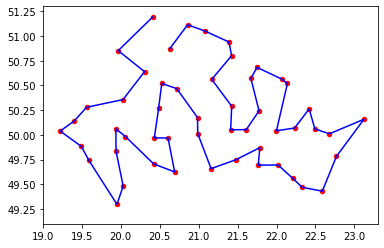

In [41]:
tour=np.array([all_cit[i] for i in t_tsp[1]]) # tablica współrzędnych
lenpa=np.round(t_tsp[0],3) # długość najkrótszej trasy

plt.ylim(49.1,51.3)
plt.xlim(19,23.3)

plt.scatter(all_cit[:,0],all_cit[:,1],c='red', s=20)

#plt.fill(tour[:,0],tour[:,1],c='blue')
plt.plot(tour[:,0],tour[:,1],c='blue')

NameError: name 'all_city_two' is not defined

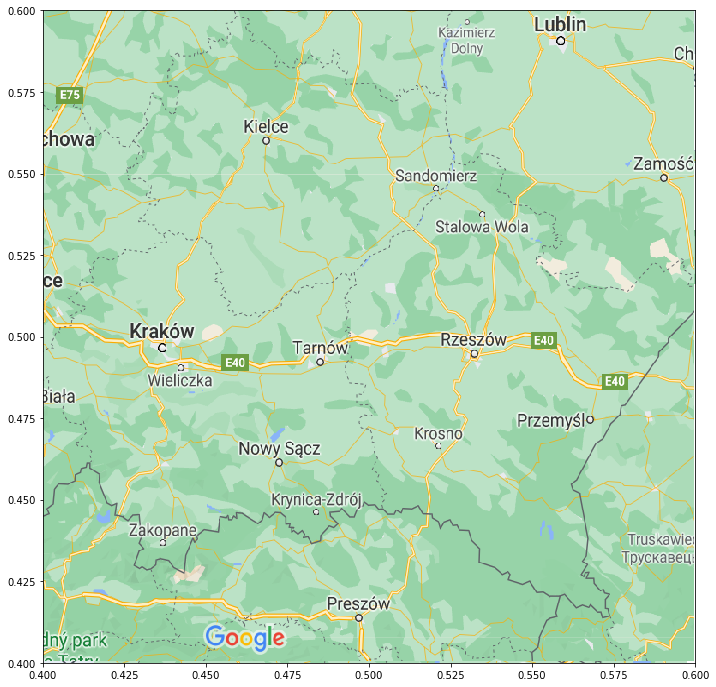

In [22]:
#Zdjęcie
img1 = plt.imread("img1.png")
fig,ax= plt.subplots(figsize=(12,12))
ax.imshow(img1, extent=[0.4,0.6,0.4,0.6])
plt.scatter(all_city_two[:,0],all_city_two[:,1],c='red', s=20)
